### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки `pandas` и визуализации с помощью `matplotlib`. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.


In [8]:
print('Hello')

Hello


In [9]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
data = pd.read_excel(r"C:\Users\User\OneDrive\Рабочий стол\Python\мо-1 дз1\end_seminar.xlsx")
df = data.copy()

In [13]:
df.tail(3)

,timestamp,id,rating,group_22,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,group_21,blended,is_ml_student
426,2024-08-19 11:49:43.000,77b2b19d26b7f160c1938369197f7cac590b2e0cfcac3b...,1232,NaN,NaN,Принятие решений в условиях риска и неопределе...,Основы разработки компьютерных игр,Введение в платформы данных,Теория и практика онлайн-экспериментов,Конфликты и кооперация (преподается на английс...,Децентрализованные системы,Да,0.440252,212.0,Соревновательный анализ данных,NaN
427,2024-08-13 14:58:30.000,6dafd9a56d08aeb419166d314b0cd6f3107ae5e8dbd636...,961,NaN,NaN,Основы информационного поиска,Дизайн систем,Язык программирования Scala,Промышленное программирование на Haskell,Методы сжатия и передачи медиаданных,Децентрализованные системы,Да,0.858491,215.0,Безопасность систем на базе LLM,NaN
428,2024-08-13 18:35:25.235,4bf710d7b89064e1a3cbcc69b7ca67c20d6181dc72ad35...,1374,NaN,NaN,Трансформерные и мультимодальные модели,Глубинное обучение для текстовых данных,Self-supervised Learning,Обучение с подкреплением,Современные языковые модели,Развёртывание ML-моделей в высоконагруженных с...,Да,0.169811,217.0,Продуктовый подход к анализу данных,NaN


Количество уникальных пользователей 22 года

In [14]:
df[~df["group_22"].isna()]['id'].nunique()

259

Количество уникальных пользователей 21 года

In [15]:
df[~df["group_21"].isna()]['id'].nunique()

159

In [16]:
df.groupby('percentile')['id'].nunique().sort_values().tail()

percentile
0.522222    3
0.118519    4
0.411111    4
0.587037    4
0.644444    5
Name: id, dtype: int64

Есть уникальные пользователи с равными перцентилями

#### 2. Изучим данные на пропуски

Количество пропусков в каждой колонке

In [17]:
df.isna().sum()

timestamp          0
id                 0
rating             0
group_22         159
is_mi            403
fall_1             0
fall_2             0
fall_3             0
spring_1          48
spring_2          48
spring_3          48
is_first_time      0
percentile         0
group_21         270
blended          270
is_ml_student    254
dtype: int64

Заполните пропуски пустой строкой для строковых колонок, нулём для числовых и False для булевых (постарайтесь избежать перечисления названий всех столбцов).

In [18]:
df = df.fillna({
    col: 0 if df[col].dtype in ('float64', 'int64')
        else '' if df[col].dtype == 'object'
        else False
    for col in df.columns})
df.head()

,timestamp,id,rating,group_22,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,group_21,blended,is_ml_student
0,2024-08-12 00:01:06,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737,226.0,0.0,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да,0.144444,0.0,,0.0
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486,2210.0,0.0,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да,0.796296,0.0,,1.0
2,2024-08-13 18:16:33,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494,223.0,0.0,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да,0.774074,0.0,,1.0
3,2024-08-14 10:22:37,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753,225.0,0.0,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да,0.096296,0.0,,0.0
4,2024-08-14 20:52:05,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685,221.0,0.0,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да,0.275926,0.0,,1.0


#### 3. Посмотрите на колонку 'is_first_time':
- Каково процентное соотношение ответов
- Сколько из них "Нет"

Процентное соотношение

In [19]:
df['is_first_time'].value_counts(normalize = True) * 100

is_first_time
Да     94.871795
Нет     5.128205
Name: proportion, dtype: float64

Количество "Нет" 

In [20]:
df[df['is_first_time'].eq('Нет')]['is_first_time'].value_counts()

is_first_time
Нет    22
Name: count, dtype: int64

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

Удаляем все обращения кроме последнего

In [21]:
df = df.sort_values('timestamp').drop_duplicates(['id'], keep = 'last')

Удаляем ненужную колонку

In [22]:
df = df.drop(columns = 'is_mi')

Все blended курсы

In [23]:
df[~df['blended'].eq('')].groupby('blended')['id'].nunique().index

Index(['ML System Design', 'Безопасность систем на базе LLM',
       'Введение в дифференциальную геометрию',
       'Продуктовый подход к анализу данных',
       'Протоколы доказательств с нулевым разглашением',
       'Соревновательный анализ данных'],
      dtype='object', name='blended')

Курс с наибольшим количеством участников

In [24]:
df.groupby('blended')['id'].nunique().drop('').sort_values().tail(1)

blended
Протоколы доказательств с нулевым разглашением    44
Name: id, dtype: int64

Курс с наибольшим средним рейтингом и количество студентов на нем

In [25]:
df.groupby('blended').mean('rating').sort_values('rating').tail(1)

,rating,group_22,percentile,group_21,is_ml_student
blended,,,,,
Продуктовый подход к анализу данных,1249.28,0.0,0.39195,290.28,0.44


In [26]:
df[df['blended'] == 'Продуктовый подход к анализу данных'].groupby('blended')['id'].nunique()

blended
Продуктовый подход к анализу данных    25
Name: id, dtype: int64

Или в один запрос

In [27]:
df.groupby('blended').agg(
    rating = ('rating','mean'),
    count_student = ('id', 'nunique')
).sort_values('rating').drop('').tail(1)

,rating,count_student
blended,,
Продуктовый подход к анализу данных,1249.28,25


#### 5. Выясним, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируем таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставим только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [28]:
df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'])['id'].nunique().reset_index().query('id > 1')

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,id
13,Statistical Learning Theory,Основы информационного поиска,Язык SQL,Дополнительные главы машинного обучения,Машинное обучение в прикладных задачах,Аналитика данных,,2
60,Безопасность компьютерных систем,Основы разработки компьютерных игр,Язык SQL,Компьютерные сети,Компьютерные сети,Компьютерные сети,,2
134,Дизайн систем,Безопасность компьютерных систем,Основы разработки компьютерных игр,Децентрализованные системы,Методы сжатия и передачи медиаданных,Теория и практика онлайн-экспериментов,Протоколы доказательств с нулевым разглашением,2
135,Дизайн систем,Безопасность компьютерных систем,Основы разработки компьютерных игр,Децентрализованные системы,Промышленное программирование на Haskell,Обучение с подкреплением,Протоколы доказательств с нулевым разглашением,2
142,Дизайн систем,Операционные системы 2,Основы информационного поиска,Промышленное программирование на Haskell,Децентрализованные системы,Методы сжатия и передачи медиаданных,Протоколы доказательств с нулевым разглашением,2
282,Системы баз данных,Операционные системы 2,Безопасность компьютерных систем,,,,,2
288,Системы баз данных,Операционные системы 2,Разработка микросервисов на Go,,,,,2
290,Системы баз данных,Операционные системы 2,Разработка микросервисов на Go,Компьютерные сети,Компьютерные сети,Компьютерные сети,,2
293,Системы баз данных,Операционные системы 2,Функциональное программирование,,,,,2
309,Системы баз данных,Разработка микросервисов на Go,Операционные системы 2,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,,2


#### 6. Найдем курсы по выбору, на которые записывались как студенты 22-го года набора, так и студенты 21-го года.

In [29]:
course_21 = pd.concat([df[df['group_22'] == 0][col] for col in ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']]).unique()
course_22 = pd.concat([df[df['group_21'] == 0][col] for col in ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']]).unique()
set(course_22) & set(course_21)

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Введение в платформы данных',
 'Интегральные уравнения в задачах математического моделирования',
 'Математические основы нейросетевых моделей',
 'Операционные системы 2',
 'Основы информационного поиска',
 'Основы разработки компьютерных игр',
 'Основы тензорных вычислений',
 'Принятие решений в условиях риска и неопределенности',
 'Специальные разделы матричного анализа',
 'Стохастический анализ',
 'Типы в языках программирования',
 'Язык программирования Scala'}

Найдем курсы, которые предлагались только студентам 22-го года и только студентам 21-го года.

In [30]:
(set(course_22) ^ set(course_21)) - {''}

{'Go от шада',
 'ML System Design',
 'Self-supervised Learning',
 'Аналитика данных',
 'Байесовские методы в машинном обучении',
 'Безопасность систем на базе LLM',
 'Введение в дифференциальную геометрию',
 'Генеративные модели в машинном обучении',
 'Генеративные модели в машинном обучении (углубленный курс)',
 'Генеративные модели на основе диффузии',
 'Генеративные модели на основе диффузии / Diffusion-Based Generative Models',
 'Глубинное обучение в анализе графовых данных',
 'Глубинное обучение в естественных науках',
 'Глубинное обучение в обработке звука',
 'Глубинное обучение для текстовых данных',
 'Децентрализованные системы',
 'Дизайн систем',
 'Дополнительные главы машинного обучения',
 'Количественные финансы',
 'Комбинаторная оптимизация',
 'Компьютерные сети',
 'Конфликты и кооперация (преподается на английском языке)',
 'Лингвистика для программистов',
 'Машинное обучение 2',
 'Машинное обучение в прикладных задачах',
 'Методы сжатия и передачи медиаданных',
 'Моделиро

Видите ли вы что-то необычное в получившихся списках? (менять ничего не нужно, просто подумайте)

**Ответ:**

### Визуализации и matplotlib

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 7. Построим график средних рейтингов по дням получения ответов (bar plot).

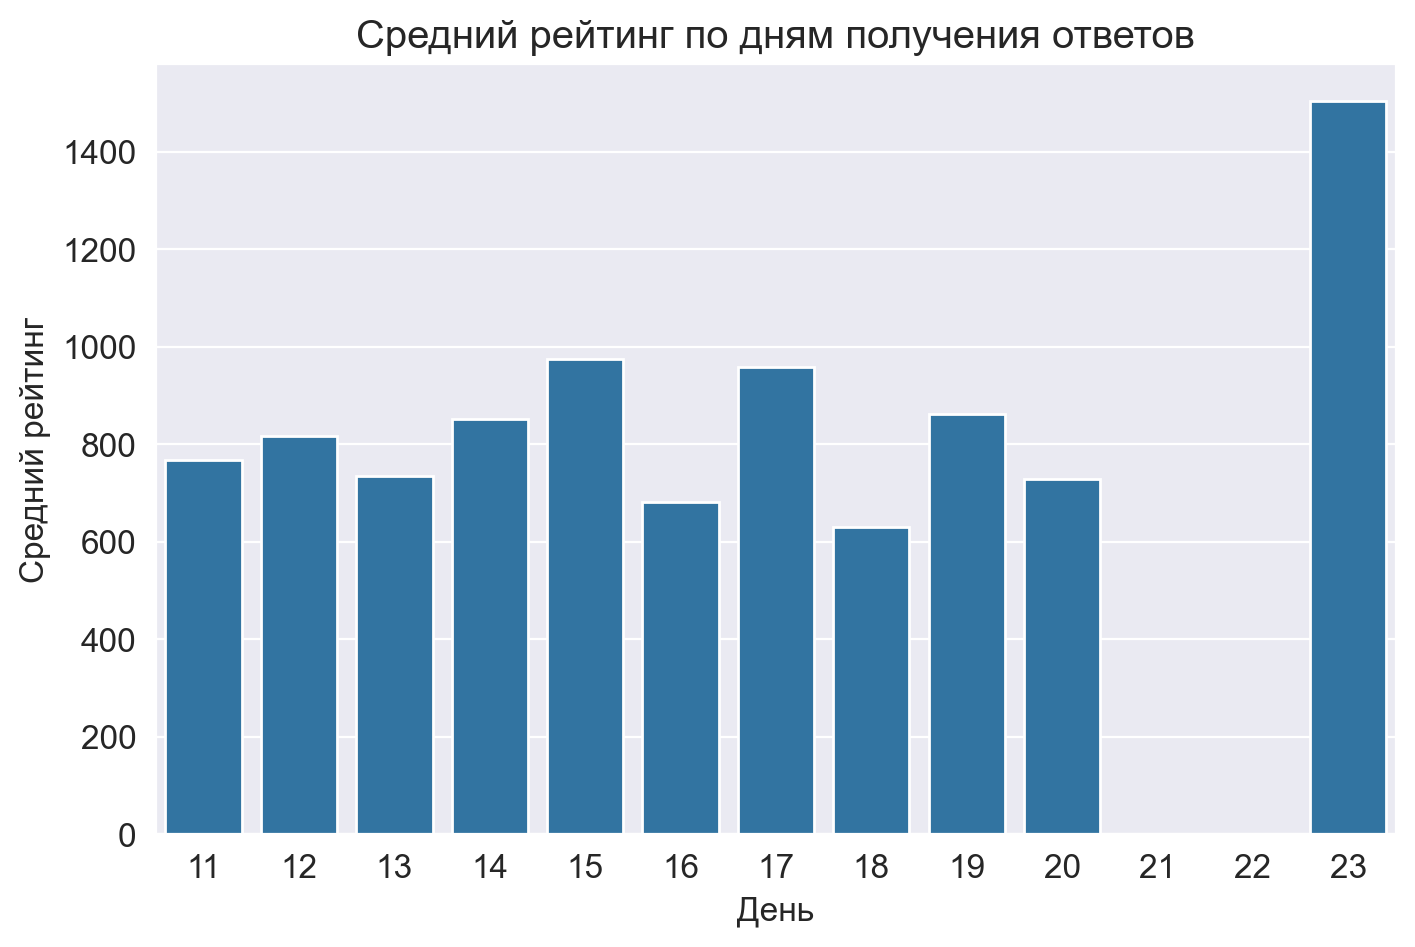

In [32]:
df['date'] = df['timestamp'].dt.day
avg_rate = df.groupby('date')['rating'].mean().reset_index()
miss_days = {'date': [21, 22], 'rating': [0, 0]}
ms = pd.DataFrame(data=miss_days)
avg_rate = pd.concat([avg_rate, ms], ignore_index = True).sort_values('date')
sns.barplot(x='date', y='rating', data=avg_rate)
plt.xlabel("День")
plt.ylabel("Средний рейтинг")
plt.title('Средний рейтинг по дням получения ответов')
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [33]:
plt.savefig('avg_perc.pdf')

<Figure size 800x500 with 0 Axes>

## 2. Распределим студентов по курсам.

## 📌 **Алгоритм распределения студентов по курсам**:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 21-го года специализаций МОП выбирают по 2 осенних курса по выбору. <i>Для студентов, которые выбирают 2 курса первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.


- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- На выходе ожидается файл `res_fall.csv` с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * три столбца: ID, course1, course2

    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"

    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.



- Соответствие номеров групп специализациям:

    * 211, 212, 213 - МОП; остальные - не МОП! 👎
    
    * У студентов 22-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 22* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о МОП. Эти знание можно получить из колонки `is_ml_student`.

- Ограничения по количеству мест на курсах по выбору:

    * Количественные финансы - 60
    * Промышленное программирование на Haskell - 60
    * Рекомендательные системы - 60
    * Глубинное обучение в обработке звука - 1000 (да да, не удивляйтесь! раньше и не такое было...)
    * Остальные курсы - 30


#### 0. Проверка

Для начала давайте убедимся, что мы успешно выполнили задания первой части и проверим данные на наличие пропусков и повторов:

In [34]:
df.drop(columns = 'date', inplace = True)
df_first_part_copy = df.copy()
assert df.shape == (418, 15), 'В таблице остались повторы или потеряны данные'
assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

#### 1. Создадим новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом нам может помочь информация о специализации и группе стундента.

In [35]:
mop = [211, 212, 213]
df['n_course'] = 1
df.loc[df['group_21'].isin(mop), ['n_course']] = 2

Проверка:

In [36]:
col_name = 'n_course' 

assert(df[df['id'] == 'bcca318e644999583156ff3ab9de3d6bd02295dcb166e39006568ffe9582207b'][col_name] == 1).all()
assert(df[df['id'] == 'edb64996c64421378537d941a77426a5a7bd84f9967ad9f523ca61386e5469ed'][col_name] == 1).all()
assert(df[df['id'] == '5f96908e3ce5d84d693ddd79670d60cd1c6a02646aa779f46586a7699dda7c25'][col_name] == 1).all()
assert(df[df['id'] == '0f137538a170b64258c0e10839cadc325e5f22fc5bb5fa9e20b7351f0a680366'][col_name] == 2).all()

#### 2. Распределим студентов в соответствии с первым приоритетом

In [37]:
cs = pd.DataFrame()
cs['course'] = pd.concat([df[col] for col in ['fall_1', 'fall_2', 'fall_3']]).unique()
cs['n_stud'] = 30
course60 = ['Количественные финансы', 'Промышленное программирование на Haskell', 'Рекомендательные системы']
cs.loc[cs['course'].isin(course60), ['n_stud']] = 60
cs.loc[cs['course'] == 'Глубинное обучение в обработке звука', ['n_stud']] = 1000
cs

,course,n_stud
0,Распределенные системы,30
1,Системы баз данных,30
2,Типы в языках программирования,30
3,Глубинное обучение для текстовых данных,30
4,Операционные системы 2,30
5,Безопасность компьютерных систем,30
6,Statistical Learning Theory,30
7,Введение в платформы данных,30
8,Глубинное обучение в обработке звука,1000
9,Прикладная статистика в машинном обучении,30


In [38]:
df1 = df.copy()
df1['course'] = df1['fall_1']
mop1 = df[df['group_21'].isin(mop)].copy()
mop1['course'] = mop1['fall_2']
df1 = pd.concat([df1, mop1], ignore_index = True)
df1.drop(columns = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended', 'group_22', 'is_first_time', 'rating'], inplace = True)
df1_sorted = df1.merge(cs, how = 'left', on = 'course').sort_values(by = ['course', 'percentile'])
df1_sorted.drop_duplicates(inplace = True)

In [39]:
df1_sorted = df1_sorted[df1_sorted.groupby('course').cumcount() < df1_sorted['n_stud']]
df1_sorted

,timestamp,id,percentile,group_21,is_ml_student,n_course,course,n_stud
429,2024-08-13 10:38:48.000,92f4503e31c17e957f5c5ce045c496f440b0565d37f9aa...,0.000000,211.0,1.0,2,Self-supervised Learning,30
388,2024-08-15 00:13:45.063,f583485bad0154b01330fee4f80b91e28147483f3ff871...,0.037736,214.0,0.0,1,Self-supervised Learning,30
76,2024-08-12 22:39:56.044,04d6a9ba366ecb91599b034bffd658190a26ffb50a9862...,0.053459,213.0,1.0,2,Self-supervised Learning,30
166,2024-08-14 01:40:32.000,ec5b044442f35321fb7de593cf28576c4190869e339687...,0.132075,211.0,1.0,2,Self-supervised Learning,30
445,2024-08-14 15:37:53.330,4fafde34a2085e0f3f7f7d91ff075bfedd1b7a799bac0e...,0.276730,211.0,1.0,2,Self-supervised Learning,30
...,...,...,...,...,...,...,...,...
157,2024-08-13 23:53:15.000,ddaf2a5025a0b6df600db0a20fc79f0dd8c77879856eef...,0.598148,0.0,0.0,1,Язык SQL,30
212,2024-08-14 15:24:02.000,c8884be16fc9e60461a42f6ce08001dcac7ccb0f6d9a02...,0.605556,0.0,0.0,1,Язык SQL,30
319,2024-08-14 21:52:43.000,5d0e8207e3f62f1b9da9415e276c2e1c77a9f9e756af7d...,0.644444,0.0,1.0,1,Язык SQL,30
408,2024-08-17 15:02:56.000,d7b54bb29ab122401ffe7f56ecb0fa33d9816d18f307f7...,0.685185,0.0,0.0,1,Язык SQL,30


In [40]:
course1 = df1_sorted.groupby('id').nth(0).reset_index()[['id', 'course']]
course1.rename(columns={'course': 'course1'}, inplace = True)
course2 = df1_sorted.groupby('id').nth(1).reset_index()[['id', 'course']]
course2.rename(columns = {'course': 'course2'}, inplace = True)
course1

,id,course1
0,92f4503e31c17e957f5c5ce045c496f440b0565d37f9aa...,Self-supervised Learning
1,f583485bad0154b01330fee4f80b91e28147483f3ff871...,Self-supervised Learning
2,04d6a9ba366ecb91599b034bffd658190a26ffb50a9862...,Self-supervised Learning
3,ec5b044442f35321fb7de593cf28576c4190869e339687...,Self-supervised Learning
4,4fafde34a2085e0f3f7f7d91ff075bfedd1b7a799bac0e...,Self-supervised Learning
...,...,...
343,ddaf2a5025a0b6df600db0a20fc79f0dd8c77879856eef...,Язык SQL
344,c8884be16fc9e60461a42f6ce08001dcac7ccb0f6d9a02...,Язык SQL
345,5d0e8207e3f62f1b9da9415e276c2e1c77a9f9e756af7d...,Язык SQL
346,d7b54bb29ab122401ffe7f56ecb0fa33d9816d18f307f7...,Язык SQL


In [41]:
res_fall = pd.DataFrame(df['id'])
res_fall['id'].nunique()

418

In [42]:
res_fall = pd.DataFrame(df['id'])
res_fall = res_fall.merge(course1, on = 'id', how = 'left')
res_fall = res_fall.merge(course2, on = 'id', how = 'left')
res_fall = res_fall.merge(df[['id', 'n_course']], on = 'id', how = 'left')
res_fall['course1'] = res_fall['course1'].fillna('???')
res_fall.loc[res_fall['n_course'] == 1, 'course2'] = res_fall['course2'].fillna('-')
res_fall.loc[res_fall['n_course'] == 2, 'course2'] = res_fall['course2'].fillna('???')
res_fall

,id,course1,course2,n_course
0,f20fbabbe393e5f0322e144ab20a21b987e1104f06353a...,Распределенные системы,-,1
1,70b7847978323ede047ee884261c905e192cb5afff2a84...,???,-,1
2,54013801d35b7652e68baa943dd0d458639ba0600a4786...,Распределенные системы,-,1
3,a900ee49379edbf0bd36a870ebb45d2c44627e9d0f1b98...,???,-,1
4,5f96908e3ce5d84d693ddd79670d60cd1c6a02646aa779...,Распределенные системы,-,1
...,...,...,...,...
413,90191629df2aed9035aacf0e6a2532d41f34a60da6b365...,???,-,1
414,56fe7a974ace3d9db2907da1bcc6ff30a9556b3bf5ef83...,Язык SQL,-,1
415,274f10a994f43939375bdfb3b3ac237243c75e9da2082b...,Прикладная статистика в машинном обучении,-,1
416,c49ced15a77a18475d260408e4c522da4cfa5a75826123...,Разработка микросервисов на Go,-,1


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [44]:
check_df = pd.read_csv(r"C:\Users\User\OneDrive\Рабочий стол\Python\мо-1 дз1\2_task_check.csv")

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

fir_col_name =       # insert name of your new column with is_first_place as str
last_col_name =      # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

Я этого не смог сделать + проверка всеравно работает не до конца корректно
Закинул в чат gpt и он сверил мой и check_df результаты, расхождения были по 4 айди, 2 связаны с тем что одному из участников конкурса присвоили 
дважды курс 'Байесовские методы в машинном обучении', и соответственно в паре с ним пользователь у которого он отобрал место на этом курсе
Вторая пара - это человек у которого две заполненные формы и в check_df взят результат из первой - ему присовен не тот курс и человек у которого он 
отобрал место на этом курсе

In [45]:
user_res = res_fall.copy()  # твой результат
true_res = check_df.copy()     # эталон

# === Приводим колонки к одному формату ===
user_res = user_res.rename(columns={
    "course_1": "course1",
    "course_2": "course2",
    "fall_courses_count": "n_course"
})
true_res = true_res.rename(columns={
    "course_1": "course1",
    "course_2": "course2",
    "fall_courses_count": "n_course"
})

common_cols = ['id', 'course1', 'course2', 'n_course']
user_res_aligned = user_res[common_cols].sort_values('id').reset_index(drop=True)
true_res_aligned = true_res[common_cols].sort_values('id').reset_index(drop=True)

# === Функция сравнения строк (для МОП курсы можно менять местами) ===
def row_equal(u, t):
    if u['n_course'] == 2:
        return set([u['course1'], u['course2']]) == set([t['course1'], t['course2']])
    else:
        return (u['course1'] == t['course1']) and (u['course2'] == t['course2'])

# === Проверка построчно ===
results = [row_equal(user_res_aligned.iloc[i], true_res_aligned.iloc[i]) for i in range(len(user_res_aligned))]

# === Итоги ===
total = len(results)
correct = sum(results)
incorrect = total - correct
incorrect_ids = user_res_aligned.loc[[not r for r in results], 'id'].tolist()

print("Всего студентов:", total)
print("Совпадает с эталоном:", correct)
print("Ошибок:", incorrect)
print("ID с расхождениями:")
print(incorrect_ids)

Всего студентов: 418
Совпадает с эталоном: 414
Ошибок: 4
ID с расхождениями:
['42ef32b37d66a14a97548fbc4ef487bc7bb4ab9f53cf0dda9952b63d90ced15e', '532a78c1cc336e7ecb1d4189f1e2498d81fa1094a4dc665d9edb9813bb38b5db', 'afcd52c59f1bfedcd5415fbdf19cb410e68de8a37687d8f5e98b148319a319a9', 'cdb87f7b15495e514eb481230b44540c6b0cfeb347c991f06b1e361fcdef0c0b']


Важный дисклеймер! У нас в датасете довольно много людей с равными перцентилями, поэтому ассерты могут провалиться, даже если ваш алгоритм правильный, смотря, как вы будете маппить таких людей. Используйте его скорее для отладки и примерного понимания, чего от вас вообще хотят

#### 3. Проведём все три волны отбора студентов на курсы по выбору

In [69]:
res_fall

,id,course1,course2,n_course
0,f20fbabbe393e5f0322e144ab20a21b987e1104f06353a...,Распределенные системы,-,1
1,70b7847978323ede047ee884261c905e192cb5afff2a84...,???,-,1
2,54013801d35b7652e68baa943dd0d458639ba0600a4786...,Распределенные системы,-,1
3,a900ee49379edbf0bd36a870ebb45d2c44627e9d0f1b98...,???,-,1
4,5f96908e3ce5d84d693ddd79670d60cd1c6a02646aa779...,Распределенные системы,-,1
...,...,...,...,...
413,90191629df2aed9035aacf0e6a2532d41f34a60da6b365...,???,-,1
414,56fe7a974ace3d9db2907da1bcc6ff30a9556b3bf5ef83...,Язык SQL,-,1
415,274f10a994f43939375bdfb3b3ac237243c75e9da2082b...,Прикладная статистика в машинном обучении,-,1
416,c49ced15a77a18475d260408e4c522da4cfa5a75826123...,Разработка микросервисов на Go,-,1


In [70]:
df

,timestamp,id,rating,group_22,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,group_21,blended,is_ml_student,n_course
143,2024-08-11 21:14:12.000,f20fbabbe393e5f0322e144ab20a21b987e1104f06353a...,775,2210.0,Распределенные системы,Системы баз данных,Разработка микросервисов на Go,Дополнительные главы машинного обучения,Машинное обучение в прикладных задачах,Стохастический анализ,Да,0.044444,0.0,,0.0,1
200,2024-08-11 21:14:37.000,70b7847978323ede047ee884261c905e192cb5afff2a84...,441,224.0,Системы баз данных,Системы баз данных,Системы баз данных,Компьютерные сети,Компьютерные сети,Компьютерные сети,Да,0.920370,0.0,,0.0,1
97,2024-08-11 21:14:43.000,54013801d35b7652e68baa943dd0d458639ba0600a4786...,646,2210.0,Распределенные системы,Системы баз данных,Операционные системы 2,Компьютерные сети,Язык программирования Go,Количественные финансы,Да,0.366667,0.0,,1.0,1
196,2024-08-11 21:15:45.000,a900ee49379edbf0bd36a870ebb45d2c44627e9d0f1b98...,566,226.0,Системы баз данных,Разработка микросервисов на Go,Принятие решений в условиях риска и неопределе...,Компьютерные сети,Промышленное программирование на языке Java,Рекомендательные системы,Да,0.575926,0.0,,0.0,1
159,2024-08-11 21:22:52.000,5f96908e3ce5d84d693ddd79670d60cd1c6a02646aa779...,660,226.0,Распределенные системы,Системы баз данных,Разработка микросервисов на Go,Компьютерные сети,Аналитика данных,Промышленное программирование на языке Java,Да,0.333333,0.0,,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2024-08-19 14:33:22.000,90191629df2aed9035aacf0e6a2532d41f34a60da6b365...,897,0.0,Дизайн систем,Эксплуатация и надёжность программных систем,Операционные системы 2,Теория и практика онлайн-экспериментов,Методы сжатия и передачи медиаданных,Децентрализованные системы,Нет,0.987421,216.0,Протоколы доказательств с нулевым разглашением,0.0,1
91,2024-08-20 09:06:02.000,56fe7a974ace3d9db2907da1bcc6ff30a9556b3bf5ef83...,759,227.0,Язык SQL,Основы информационного поиска,Принятие решений в условиях риска и неопределе...,Машинное обучение 2,Машинное обучение в прикладных задачах,Рекомендательные системы,Да,0.081481,0.0,,0.0,1
231,2024-08-20 11:28:32.000,274f10a994f43939375bdfb3b3ac237243c75e9da2082b...,696,229.0,Прикладная статистика в машинном обучении,Разработка микросервисов на Go,Введение в платформы данных,Генеративные модели в машинном обучении (углуб...,Рекомендательные системы,Дополнительные главы машинного обучения,Да,0.250000,0.0,,0.0,1
117,2024-08-20 23:24:23.000,c49ced15a77a18475d260408e4c522da4cfa5a75826123...,733,222.0,Разработка микросервисов на Go,Язык программирования Scala,Принятие решений в условиях риска и неопределе...,Машинное обучение в прикладных задачах,Аналитика данных,Язык программирования Go,Да,0.155556,0.0,,0.0,1


In [76]:
percentile = df[['id', 'percentile']]
res_fall = res_fall.merge(percentile, on = 'id', how = 'left')

In [83]:
nedobor = res_fall[(res_fall.course1 == "???") | (res_fall.course2 == "???")]

In [84]:
c1 = res_fall[res_fall.course1 != "???"].course1.value_counts()

In [85]:
c2 = res_fall[(res_fall.course2 != "-") & (res_fall.course2 != "???")].course2.value_counts()

In [86]:
zanyto = c1.add(c2, fill_value = 0).astype(int)
courses_s = cs.set_index("course")["n_stud"]
svobodno = courses_s.add(-zanyto, fill_value = 0).astype(int)
svobodno = svobodno.to_frame(name = "course").reset_index()
svobodno.columns = ["course", "n_stud"]
svobodno

,course,n_stud
0,Self-supervised Learning,12
1,Statistical Learning Theory,4
2,Байесовские методы в машинном обучении,0
3,Безопасность компьютерных систем,12
4,Введение в платформы данных,9
5,Генеративные модели на основе диффузии,27
6,Генеративные модели на основе диффузии / Diffu...,20
7,Глубинное обучение в анализе графовых данных,27
8,Глубинное обучение в обработке звука,972
9,Глубинное обучение для текстовых данных,0


In [87]:
df_new = df.copy()
df_new = df_new[["id", "fall_2", "fall_3"]]
df_new = df_new.merge(nedobor, on="id", how="inner")
#df_new["prioritet"] = np.nan
df_new.loc[df_new.n_course == 1, "prioritet"] = df_new.loc[df_new.n_course == 1, "fall_2"]
df_new.loc[df_new.n_course == 2, "prioritet"] = df_new.loc[df_new.n_course == 2, "fall_3"]
df_new = df_new.merge(svobodno, left_on="prioritet", right_on="course", how="left")
df_new = df_new[["id", "course1", "course2", "percentile", "n_course", "prioritet", "n_stud"]]

In [88]:
df_new

,id,course1,course2,percentile,n_course,prioritet,n_stud
0,70b7847978323ede047ee884261c905e192cb5afff2a84...,???,-,0.920370,1,Системы баз данных,0
1,a900ee49379edbf0bd36a870ebb45d2c44627e9d0f1b98...,???,-,0.575926,1,Разработка микросервисов на Go,17
2,22f1e637ae66b9b44455c0957867311e24bc58e6756eaa...,???,-,0.825926,1,Операционные системы 2,12
3,5d74500c681e1d17d1cbcdc107d176e770df6342999cbd...,???,-,0.974074,1,Операционные системы 2,12
4,29b1507eb0e2b983d77f399ae0f741b30177880515722e...,???,-,0.511111,1,Операционные системы 2,12
...,...,...,...,...,...,...,...
69,1ebed7a96b21d1ce0a579e461a0bd60155a0970421640e...,???,-,0.883333,1,Распределенные системы,0
70,a2c79623438177c04a31ee550dbcfe4d61948c2ea8874e...,???,-,0.713836,1,Основы разработки компьютерных игр,10
71,6fa015d8846e21f4f79bac013b469a1e6e962fffd6121b...,Statistical Learning Theory,???,0.987421,2,Генеративные модели на основе диффузии / Diffu...,20
72,2dc24dc9f0746a61093443321c0b5fe1ec00b84161af9c...,???,-,0.883333,1,Распределенные системы,0


In [89]:
mimo_srazu = df_new[df_new.n_stud == 0].copy()
ne_mimo_srazu = df_new[df_new.n_stud != 0].copy()

In [90]:
# res_first = df_fall_first.groupby("fall_1", as_index=False).apply(lambda x: x.head(x.quantity.iloc[0])).reset_index(drop=True)
ne_mimo_srazu = ne_mimo_srazu.sort_values(["prioritet", "percentile"])

res_second = ne_mimo_srazu.groupby("prioritet", as_index=False).apply(lambda x: x.head(x.n_stud.iloc[0])).reset_index(drop=True)

C:\Users\User\AppData\Local\Temp\ipykernel_2288\3298965269.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res_second = ne_mimo_srazu.groupby("prioritet", as_index=False).apply(lambda x: x.head(x.n_stud.iloc[0])).reset_index(drop=True)


In [91]:
mimo_srazu = pd.concat([mimo_srazu, ne_mimo_srazu[~ne_mimo_srazu.id.isin(res_second.id)]])

In [92]:
res_second.loc[res_second.course1 == "???", "course1"] = res_second.loc[res_second.course1 == "???", "prioritet"]
res_second.loc[res_second.course2 == "???", "course2"] = res_second.loc[res_second.course2 == "???", "prioritet"]
res_second = res_second[["id", "course1", "course2", "percentile", "n_course"]]

In [93]:
fall2 = pd.concat([res_fall[~res_fall.id.isin(res_second.id)], res_second])

In [94]:
fall2

,id,course1,course2,n_course,percentile
0,f20fbabbe393e5f0322e144ab20a21b987e1104f06353a...,Распределенные системы,-,1,0.044444
1,70b7847978323ede047ee884261c905e192cb5afff2a84...,???,-,1,0.920370
2,54013801d35b7652e68baa943dd0d458639ba0600a4786...,Распределенные системы,-,1,0.366667
4,5f96908e3ce5d84d693ddd79670d60cd1c6a02646aa779...,Распределенные системы,-,1,0.333333
5,3dfdd5063aed7b034c0f7b5ffbec75b61041d532382a4a...,Типы в языках программирования,-,1,0.415094
...,...,...,...,...,...
46,bae0ebbf1acc5e974a43e56b4a707fef37eb021bb02226...,Функциональное программирование,-,1,0.622222
47,6e30ea53445c6e0744e07989d604c5a44a96df742e2045...,Функциональное программирование,-,1,0.714815
48,c4277002951631ec6499555f3cf1d001649f01fe946c28...,Эксплуатация и надёжность программных систем,-,1,0.679245
49,90191629df2aed9035aacf0e6a2532d41f34a60da6b365...,Эксплуатация и надёжность программных систем,-,1,0.987421


In [95]:
nedobor2 = fall2[fall2.course1 == "???"] # у моповцев уже нет шанса отобраться после 2й волны

In [96]:
c11 = fall2[fall2.course1 != "???"].course1.value_counts()
c22 = fall2[(fall2.course2 != "???") & (fall2.course2 != "-")].course2.value_counts()

In [98]:
zanyto2 = c11.add(c22, fill_value = 0).astype(int)
courses_s = cs.set_index("course")["n_stud"]
svobodno2 = courses_s.add(-zanyto2, fill_value = 0).astype(int)
svobodno2 = svobodno2.to_frame(name = "course").reset_index()
svobodno2.columns = ["course", "n_stud"]

In [99]:
df_new2 = df.copy()
df_new2 = df_new2[["id", "fall_3"]]
df_new2 = df_new2.merge(nedobor2, on="id", how="inner")
df_new2 = df_new2[["id", "course1", "course2", "percentile", "n_course", "fall_3"]]
df_new2 = df_new2.merge(svobodno2, left_on="fall_3", right_on="course", how="left")
df_new2.drop("course", axis=1, inplace=True)

In [100]:
mimo_srazu2 = df_new2[df_new2.n_stud == 0].copy()
ne_mimo_srazu2 = df_new2[~df_new2.id.isin(mimo_srazu2.id)].copy()

In [101]:
ne_mimo_srazu2

,id,course1,course2,percentile,n_course,fall_3,n_stud
4,4ccf2c54e9812d4af34a8e4ca68bd98966a9178ed4f854...,???,-,0.837037,1,Основы тензорных вычислений,24
14,f677ce236730b156bb7ffdd7b512fd6f39a6f19586c49d...,???,-,0.555556,1,Введение в платформы данных,8
19,1ebed7a96b21d1ce0a579e461a0bd60155a0970421640e...,???,-,0.883333,1,Язык программирования Scala,28
20,2dc24dc9f0746a61093443321c0b5fe1ec00b84161af9c...,???,-,0.883333,1,Безопасность компьютерных систем,8


In [102]:
res_third = ne_mimo_srazu2.copy()
res_third.loc[res_third.course1 == "???", "course1"] = res_third.loc[res_third.course1 == "???", "fall_3"]
res_third = res_third[["id", "course1", "course2", "percentile", "n_course"]]

In [108]:
fall3 = pd.concat([fall2[~fall2.id.isin(res_third.id)], res_third])

In [113]:
fall = fall3[["id", "course1", "course2"]].copy()
fall = df.merge(fall, on="id")
fall = fall[["id", "course1", "course2"]]
fall.to_csv("res_fall.csv", index=None)

In [114]:
fall

,id,course1,course2
0,f20fbabbe393e5f0322e144ab20a21b987e1104f06353a...,Распределенные системы,-
1,70b7847978323ede047ee884261c905e192cb5afff2a84...,???,-
2,54013801d35b7652e68baa943dd0d458639ba0600a4786...,Распределенные системы,-
3,a900ee49379edbf0bd36a870ebb45d2c44627e9d0f1b98...,Разработка микросервисов на Go,-
4,5f96908e3ce5d84d693ddd79670d60cd1c6a02646aa779...,Распределенные системы,-
...,...,...,...
413,90191629df2aed9035aacf0e6a2532d41f34a60da6b365...,Эксплуатация и надёжность программных систем,-
414,56fe7a974ace3d9db2907da1bcc6ff30a9556b3bf5ef83...,Язык SQL,-
415,274f10a994f43939375bdfb3b3ac237243c75e9da2082b...,Прикладная статистика в машинном обучении,-
416,c49ced15a77a18475d260408e4c522da4cfa5a75826123...,Разработка микросервисов на Go,-
